In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

2024-08-08 13:23:26.355703: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/catarinavuzi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### **Comparing the Models performance**

- In this notebook we will compare the performance  the models with and without augmentation. 

- Both models do not show high percentage for roc curves, but the model with augmentation  performs better. 

In [2]:
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/Users/catarinavuzi/Downloads/cracked_uncracked_images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Using 40 files for validation.


2024-08-08 13:23:39.390713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


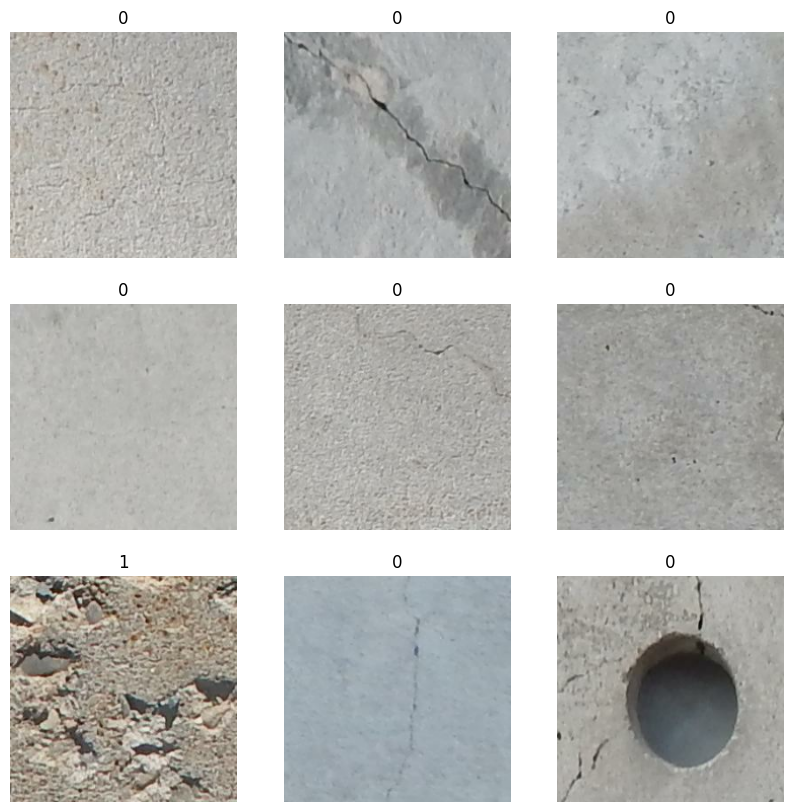

In [3]:
##Taking a look to the images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

#### **Loading both models**

In [4]:
# Load the model
loaded_model_1 = keras.models.load_model('make_model_1.keras')

In [5]:
loaded_model_2 = keras.models.load_model('make_model_2.keras')

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 987ms/step


2024-08-08 13:24:05.561129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


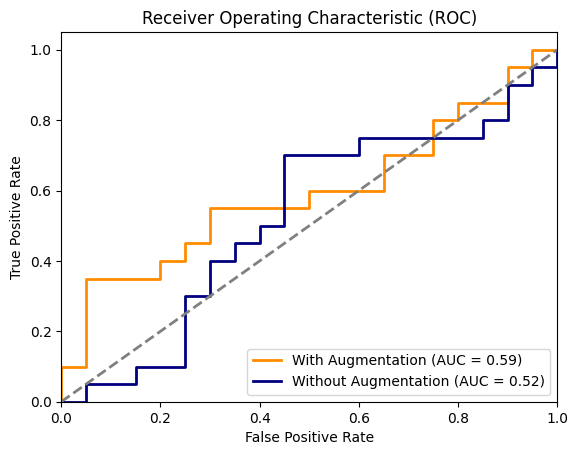

In [6]:
# Get predictions for validation set

model_with_augmentation = keras.models.load_model('make_model_2.keras')
# Assuming you have a model trained without augmentation saved as 'model_without_augmentation.keras'
model_without_augmentation = keras.models.load_model('make_model_1.keras')

y_pred_with_augmentation = model_with_augmentation.predict(val_ds)
y_pred_without_augmentation = model_without_augmentation.predict(val_ds)

# Assuming 'val_ds' has true labels accessible as 'val_ds.labels'
# If not, adjust this to how you access true labels from your validation set
y_true = []
for _, label in val_ds:
  y_true.extend(label.numpy())

y_true = np.array(y_true)

# Calculate ROC curves
fpr_with, tpr_with, _ = roc_curve(y_true, y_pred_with_augmentation)
roc_auc_with = auc(fpr_with, tpr_with)

fpr_without, tpr_without, _ = roc_curve(y_true, y_pred_without_augmentation)
roc_auc_without = auc(fpr_without, tpr_without)

# Plot ROC curves
plt.figure()
plt.plot(fpr_with, tpr_with, color='darkorange', lw=2, label='With Augmentation (AUC = %0.2f)' % roc_auc_with)
plt.plot(fpr_without, tpr_without, color='navy', lw=2, label='Without Augmentation (AUC = %0.2f)' % roc_auc_without)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
